# Estimating the value of Pi using Monte Carlo

The idea is to simulate random (x, y) points in a 2-D plane with domain as a square of side 2r units centered on (0,0). Imagine a circle inside the same domain with same radius r and inscribed into the square. We then calculate the ratio of number points that lied inside the circle and total number of generated points - [geeksforgeeks](https://www.geeksforgeeks.org/estimating-value-pi-using-monte-carlo/)

In [1]:
import os
import numpy as np
from math import pi
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
N = 50_000
points = np.random.uniform(-1, 1, size=(N, 2))
circle_idxs = []
not_circle_idx = []
for idx, point in enumerate(points) :
    x, y = point[0], point[1]
    if x**2 + y**2 <= 1 :
        circle_idxs.append(idx)
    else :
        not_circle_idx.append(idx)
        
circle_points = points[np.array(circle_idxs)]
not_circle_points = points[np.array(not_circle_idx)]

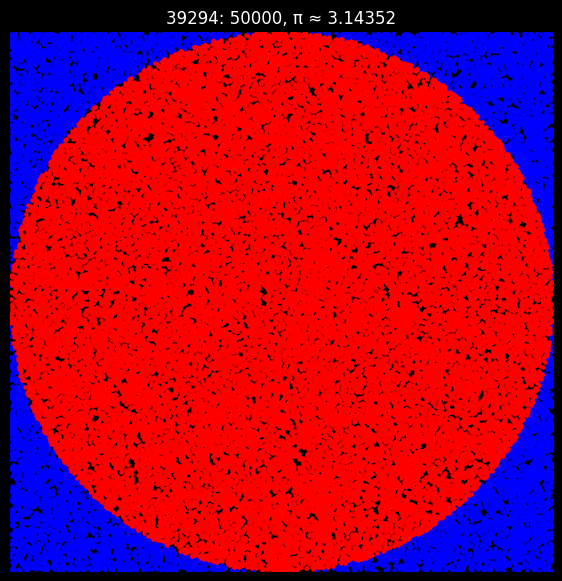

In [3]:
plt.figure(figsize=(7, 7))
plt.title(f"{circle_points.shape[0]}: {N}, π ≈ {4*circle_points.shape[0]/N}")
plt.scatter(not_circle_points[:, 0], not_circle_points[:, 1], s=5, c='blue')
plt.scatter(circle_points[:, 0], circle_points[:, 1], s=5, c='red')
plt.axis(False)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.show()

### PI estimation
- πr²/4r² = points in circle(red) / all
- π/4 = points(red/all)
- π = 4*points(red/all)

In [4]:
def estimate_pi(points_in_circles: int, all_points: int) -> float :
    return 4*points_in_circles/all_points

In [5]:
est_pi = estimate_pi(circle_points.shape[0], N)
est_pi

3.14352

In [6]:
def monte_carlo_pi_est(n_point: int) -> float :
    points = np.random.uniform(-1, 1, size=(n_point, 2))
    circle_idxs = []
    not_circle_idx = []
    for idx, point in enumerate(points) :
        x, y = point[0], point[1]
        if x**2 + y**2 <= 1 :
            circle_idxs.append(idx)
        else :
            not_circle_idx.append(idx)

    circle_points = points[np.array(circle_idxs)]
    not_circle_points = points[np.array(not_circle_idx)]
    
    plt.figure(figsize=(7, 7))
    est_pi = estimate_pi(circle_points.shape[0], n_point)
    plt.title(f"{circle_points.shape[0]}: {n_point}, π ≈ {est_pi}")
    plt.scatter(not_circle_points[:, 0], not_circle_points[:, 1], s=7, c='blue')
    plt.scatter(circle_points[:, 0], circle_points[:, 1], s=7, c='red')
    plt.axis(False)
    plt.xlim([-1, 1])
    plt.ylim([-1, 1])
    plt.savefig(f"est_pi/{n_point}_est_pi.pdf")
    plt.close()
    return est_pi

In [7]:
n_points = [10, 15, 20, 25]
pi_values = []
os.makedirs("est_pi", exist_ok=True)
for n_point in n_points :
    est_pi = monte_carlo_pi_est(n_point)
    pi_values.append((n_point, est_pi))

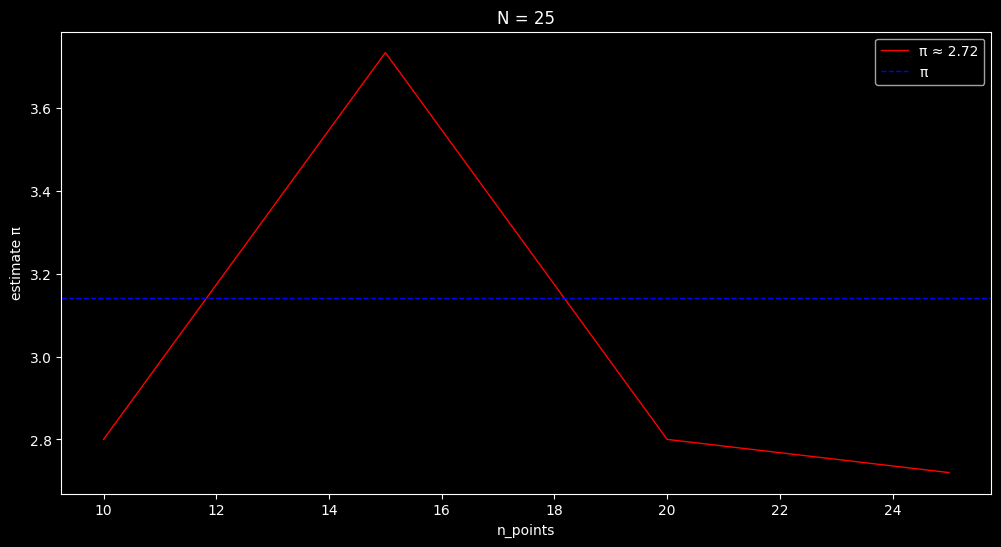

In [8]:
pi_values = np.array(pi_values)
plt.figure(figsize=(12, 6))
plt.title(f"N = {int(pi_values[-1, 0])}")
plt.grid(False)
plt.plot(pi_values[:, 0], pi_values[:, 1], linewidth=1, label=f"π ≈ {pi_values[-1, 1]}", c='r')
plt.axhline(pi, linewidth=1, linestyle='--', label="π", c='blue')
plt.legend()
plt.xlabel("n_points")
plt.ylabel("estimate π")
plt.show()

In [11]:
n_points = [10, 15, 20, 25, 50, 70, 100, 150, 200, 250, 400, 500, 700, 1_000, 
            2_000, 4_000, 5_000, 7_000, 10_000, 20_000, 40_000, 60_000, 100_000]

pi_values = []
for n_point in n_points :
    est_pi = monte_carlo_pi_est(n_point)
    pi_values.append((n_point, est_pi))

pi_values = np.array(pi_values)
for n in range(1, len(pi_values)) :
    plt.figure(figsize=(12, 6))
    plt.title(f"N = {int(n_points[n])}")
    plt.grid(False)
    # line need at least 2 points
    plt.plot(pi_values[:, 0][:n+1], pi_values[:, 1][:n+1], linewidth=1, label=f"π ≈ {pi_values[n, 1]}", c='r')
    plt.axhline(pi, linewidth=1, linestyle='--', label="π", c='blue')
    plt.legend()
    plt.xlabel("n_points")
    plt.ylabel("estimate π")
    plt.savefig(f"est_pi/graph_{n_points[n]}.pdf")
    plt.close()

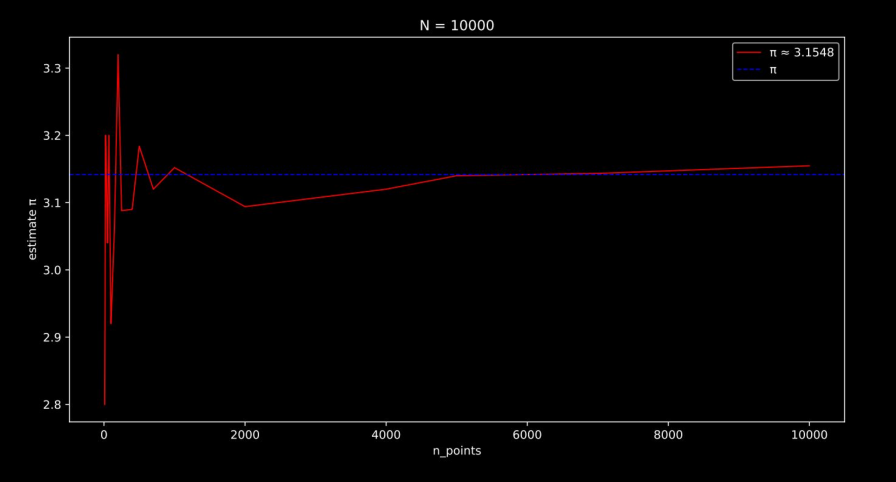

In [13]:
from PIL import Image 

img = np.array(Image.open("est_pi/est_10k.jpg"))
plt.figure(figsize=(12, 6))
plt.imshow(img)
plt.axis(False)
plt.show()